<a href="https://colab.research.google.com/github/mihatronych/tech_ch_m/blob/main/tech_ch_m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import csv
import sklearn as sk
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap

In [55]:
path = '/content/drive/My Drive/for_stii/weight-height.csv'

In [56]:
data = pd.read_csv(path, ',')

In [57]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [58]:
men = data
fem = data

In [60]:
men = men.query('Gender == "Male"')
men = men[['Height', 'Weight']]

In [61]:
fem = fem.query('Gender == "Female"')
fem = fem[['Height', 'Weight']]

In [62]:
#Перевод роста в дюймах в сантиметры
men['Height'] = men['Height'].apply(lambda x: x*2.54)
fem['Height'] = fem['Height'].apply(lambda x: x*2.54)
#Перевод веса в фунтах в килограммы
men['Weight'] = men['Weight'].apply(lambda x: x*0.4536)
fem['Weight'] = fem['Weight'].apply(lambda x: x*0.4536)

In [64]:
men

,Height,Weight
0,187.571423,109.722920
1,174.706036,73.624030
2,188.239668,96.499252
3,182.196685,99.811265
4,177.499761,93.600270
...,...,...
4995,174.904559,80.346645
4996,175.192494,72.251780
4997,170.215039,90.355033
4998,181.756605,84.326921


In [63]:
fem

,Height,Weight
5000,149.633259,46.307265
5001,165.684232,64.096321
5002,160.957270,59.440380
5003,163.779193,58.138597
5004,156.954464,58.868846
...,...,...
9995,168.078536,62.042253
9996,170.350573,77.505682
9997,162.224700,58.276405
9998,175.346978,74.323476


Text(0, 0.5, 'Вес М')

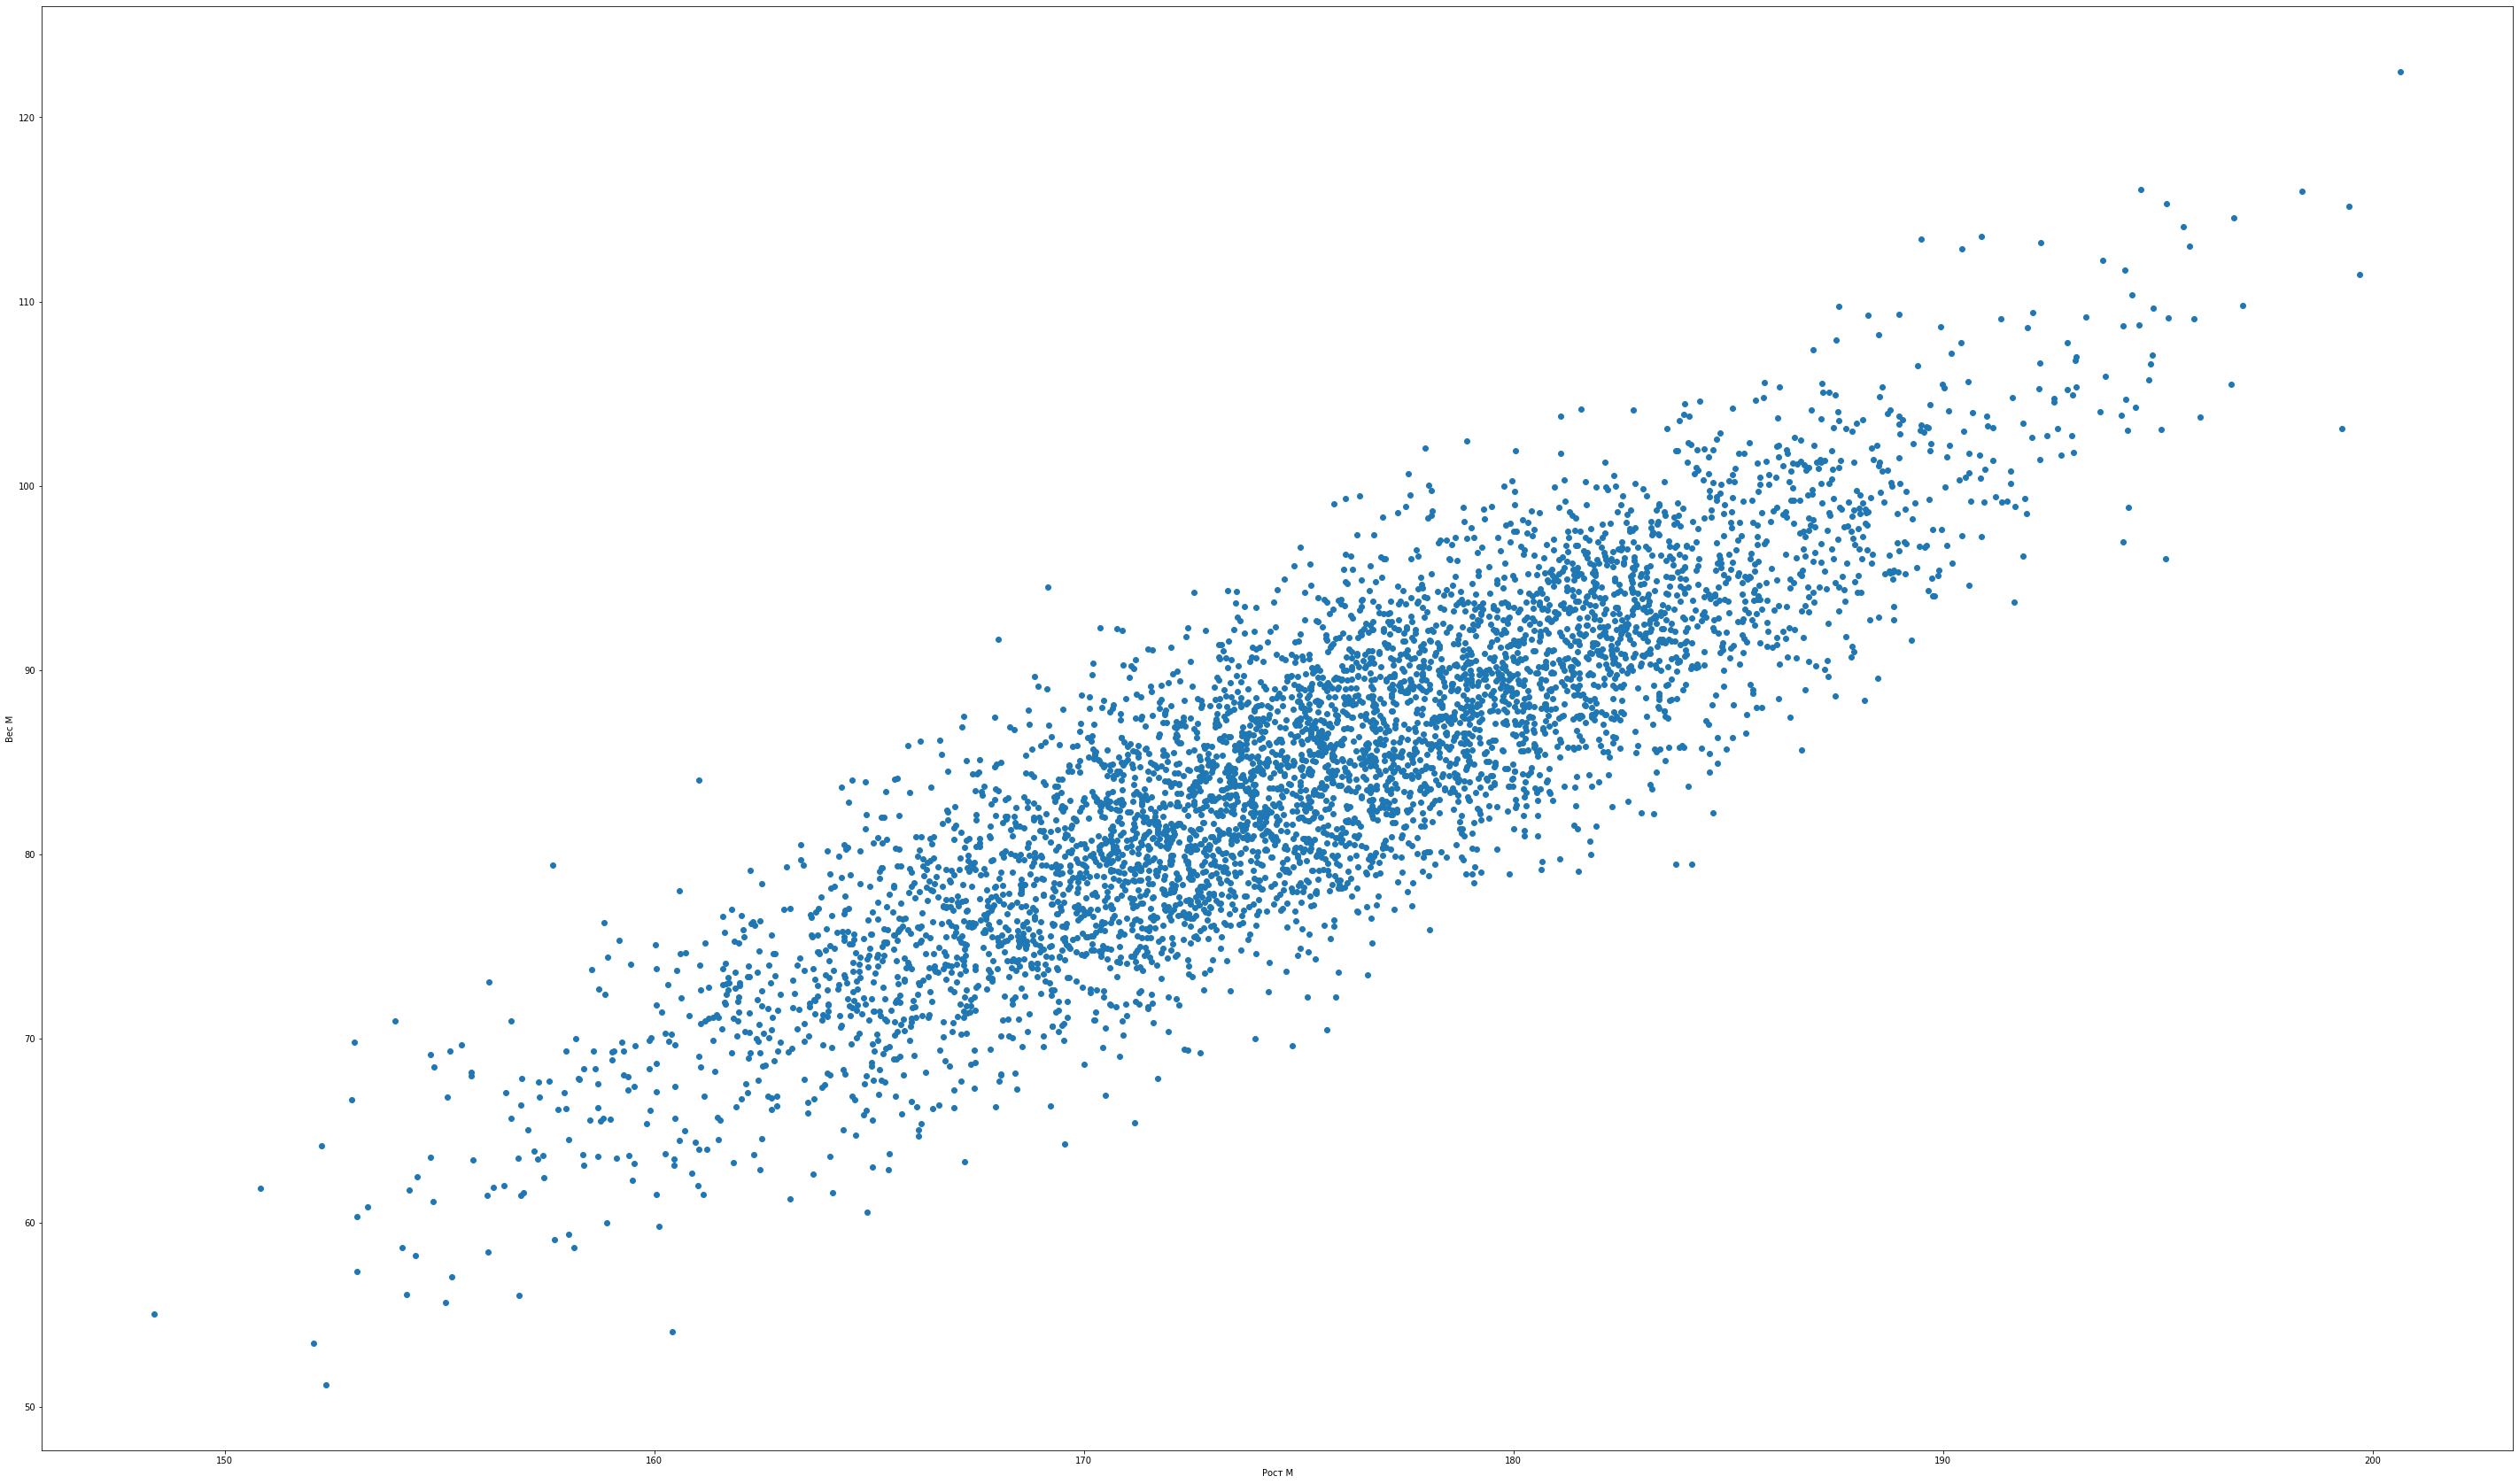

In [165]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.scatter(x = men['Height'], y = men['Weight'])
plt.xlabel("Рост М")
plt.ylabel("Вес М")

Text(0, 0.5, 'Вес Ж')

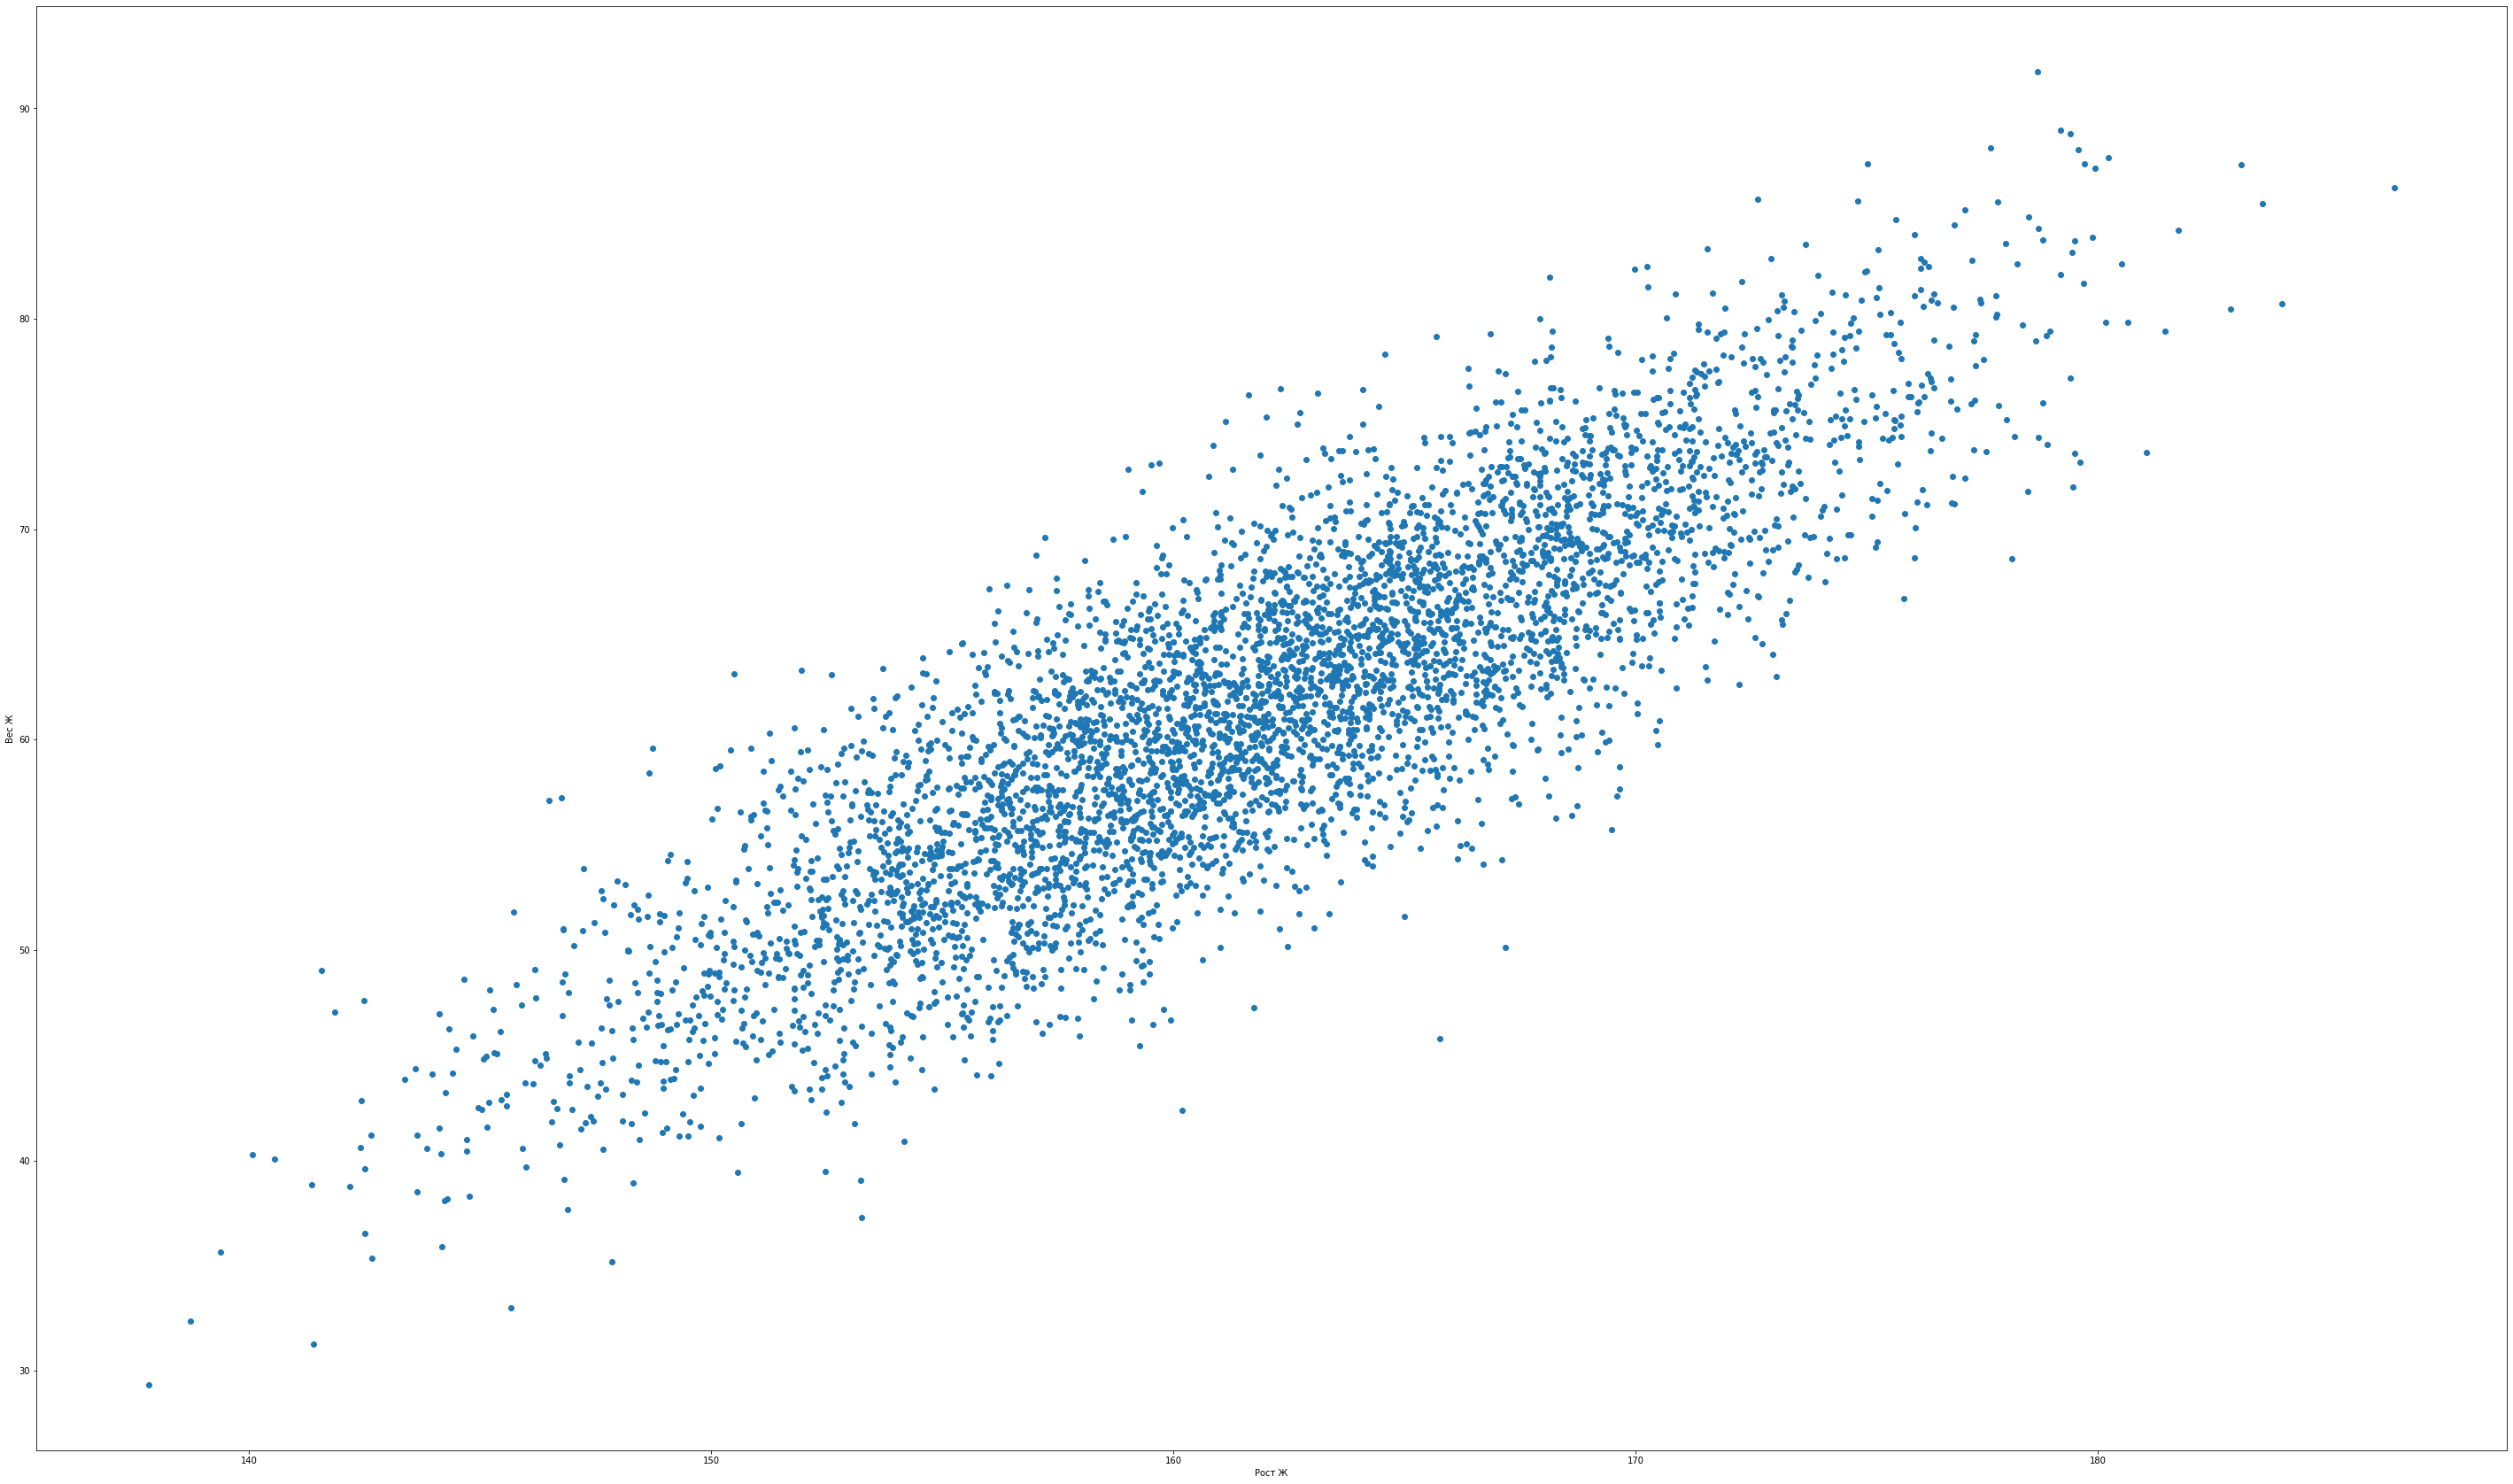

In [166]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.scatter(x = fem['Height'], y = fem['Weight'])
plt.xlabel("Рост Ж")
plt.ylabel("Вес Ж")

In [137]:
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(men['Height'], men['Weight'], test_size = 0.3)
X_train_fem, X_test_fem, y_train_fem, y_test_fem = train_test_split(fem['Height'], fem['Weight'], test_size = 0.3)

X_train_men, X_test_men = np.array(X_train_men.astype('int')), np.array(X_test_men.astype('int'))
X_train_fem, X_test_fem = np.array(X_train_fem.astype('int')), np.array(X_test_fem.astype('int'))

pipe_men = make_pipeline(StandardScaler(), LogisticRegression())
pipe_men.fit(X_train_men.reshape(-1, 1), y_train_men.astype('int'))

pipe_fem = make_pipeline(StandardScaler(), LogisticRegression())
pipe_fem.fit(X_train_fem.reshape(-1, 1), y_train_fem.astype('int'))


print(pipe_men.score(X_test_men.reshape(-1, 1), y_test_men.astype('int')))
print(pipe_fem.score(X_test_fem.reshape(-1, 1), y_test_fem.astype('int')))

predictions_men = pipe_men.predict(X_test_men.reshape(-1, 1))
predictions_fem = pipe_fem.predict(X_test_men.reshape(-1, 1))

0.084
0.07333333333333333


In [142]:
# мужской mae
metrics.mean_absolute_error(y_test_men, predictions_men)

3.8722496954881875

In [143]:
# женский mae
metrics.mean_absolute_error(y_test_fem, predictions_fem)

12.431103896045903

In [152]:
# мужской mse!!!
metrics.mean_squared_error(y_test_men, predictions_men)

23.110444851403503

In [154]:
# женский mse!!!
metrics.mean_squared_error(y_test_fem, predictions_fem)

224.25003615165448

In [144]:
# мужской r2
metrics.r2_score(y_test_men, predictions_men)

0.6944550237021212

In [145]:
# женский r2
metrics.r2_score(y_test_fem, predictions_fem)

-1.8218936995617159

In [150]:
from sklearn.model_selection import cross_val_score
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)
lasso_scoring = cross_val_score(pipe_men, np.array(men['Height']).astype('int').reshape(-1, 1), men['Weight'].astype('int'), scoring=scorer, cv=10)
print ('Мужской mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Мужской mean: 3.8362000000000003, std: 0.15788717490664028


In [151]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)
lasso_scoring = cross_val_score(pipe_fem, np.array(fem['Height']).astype('int').reshape(-1, 1), fem['Weight'].astype('int'), scoring=scorer, cv=10)
print ('Женский mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Женский mean: 3.7652, std: 0.0955330309369487


Text(0, 0.5, 'Вес М')

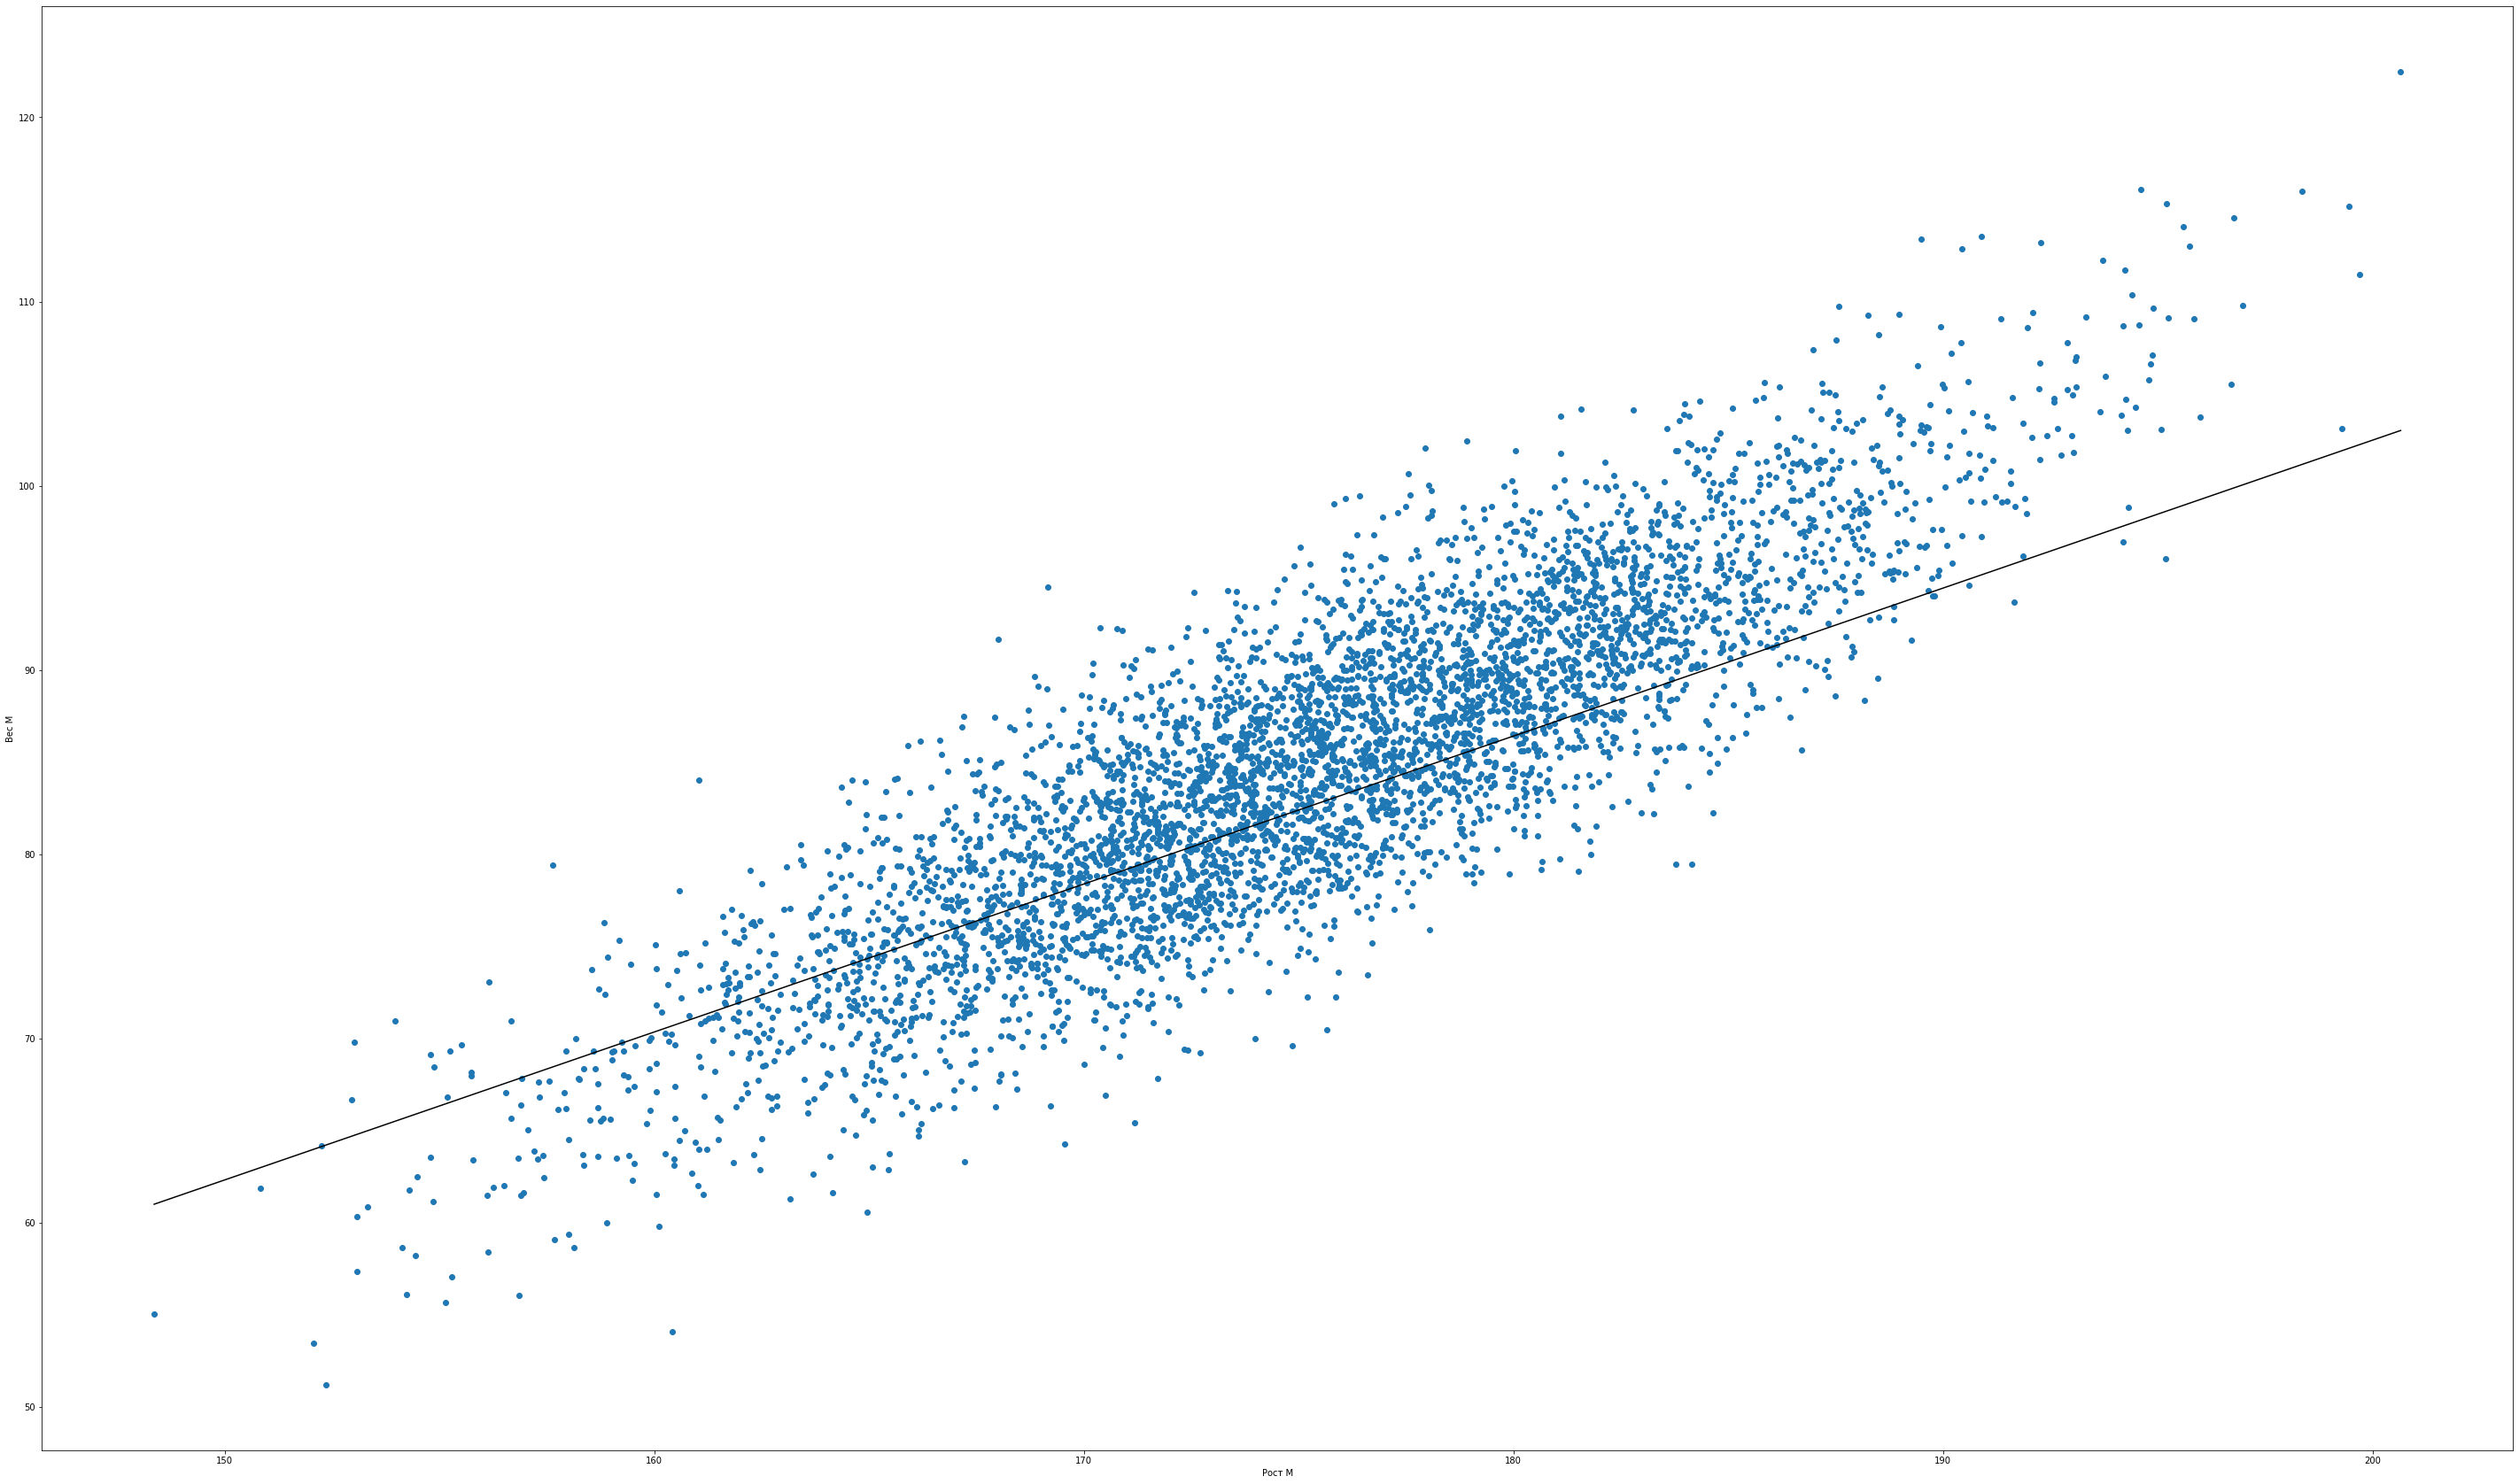

In [148]:
#Мужской график регрессии
fig, ax = plt.subplots(figsize=(50, 30))
ax.scatter(x=men['Height'], y=men['Weight'])
min_max = [men['Height'].min(), men['Height'].max()]
ax.plot(min_max, pipe_men.predict(np.array(min_max).reshape(-1, 1)), color='k')
plt.xlabel("Рост М")
plt.ylabel("Вес М")

Text(0, 0.5, 'Вес М')

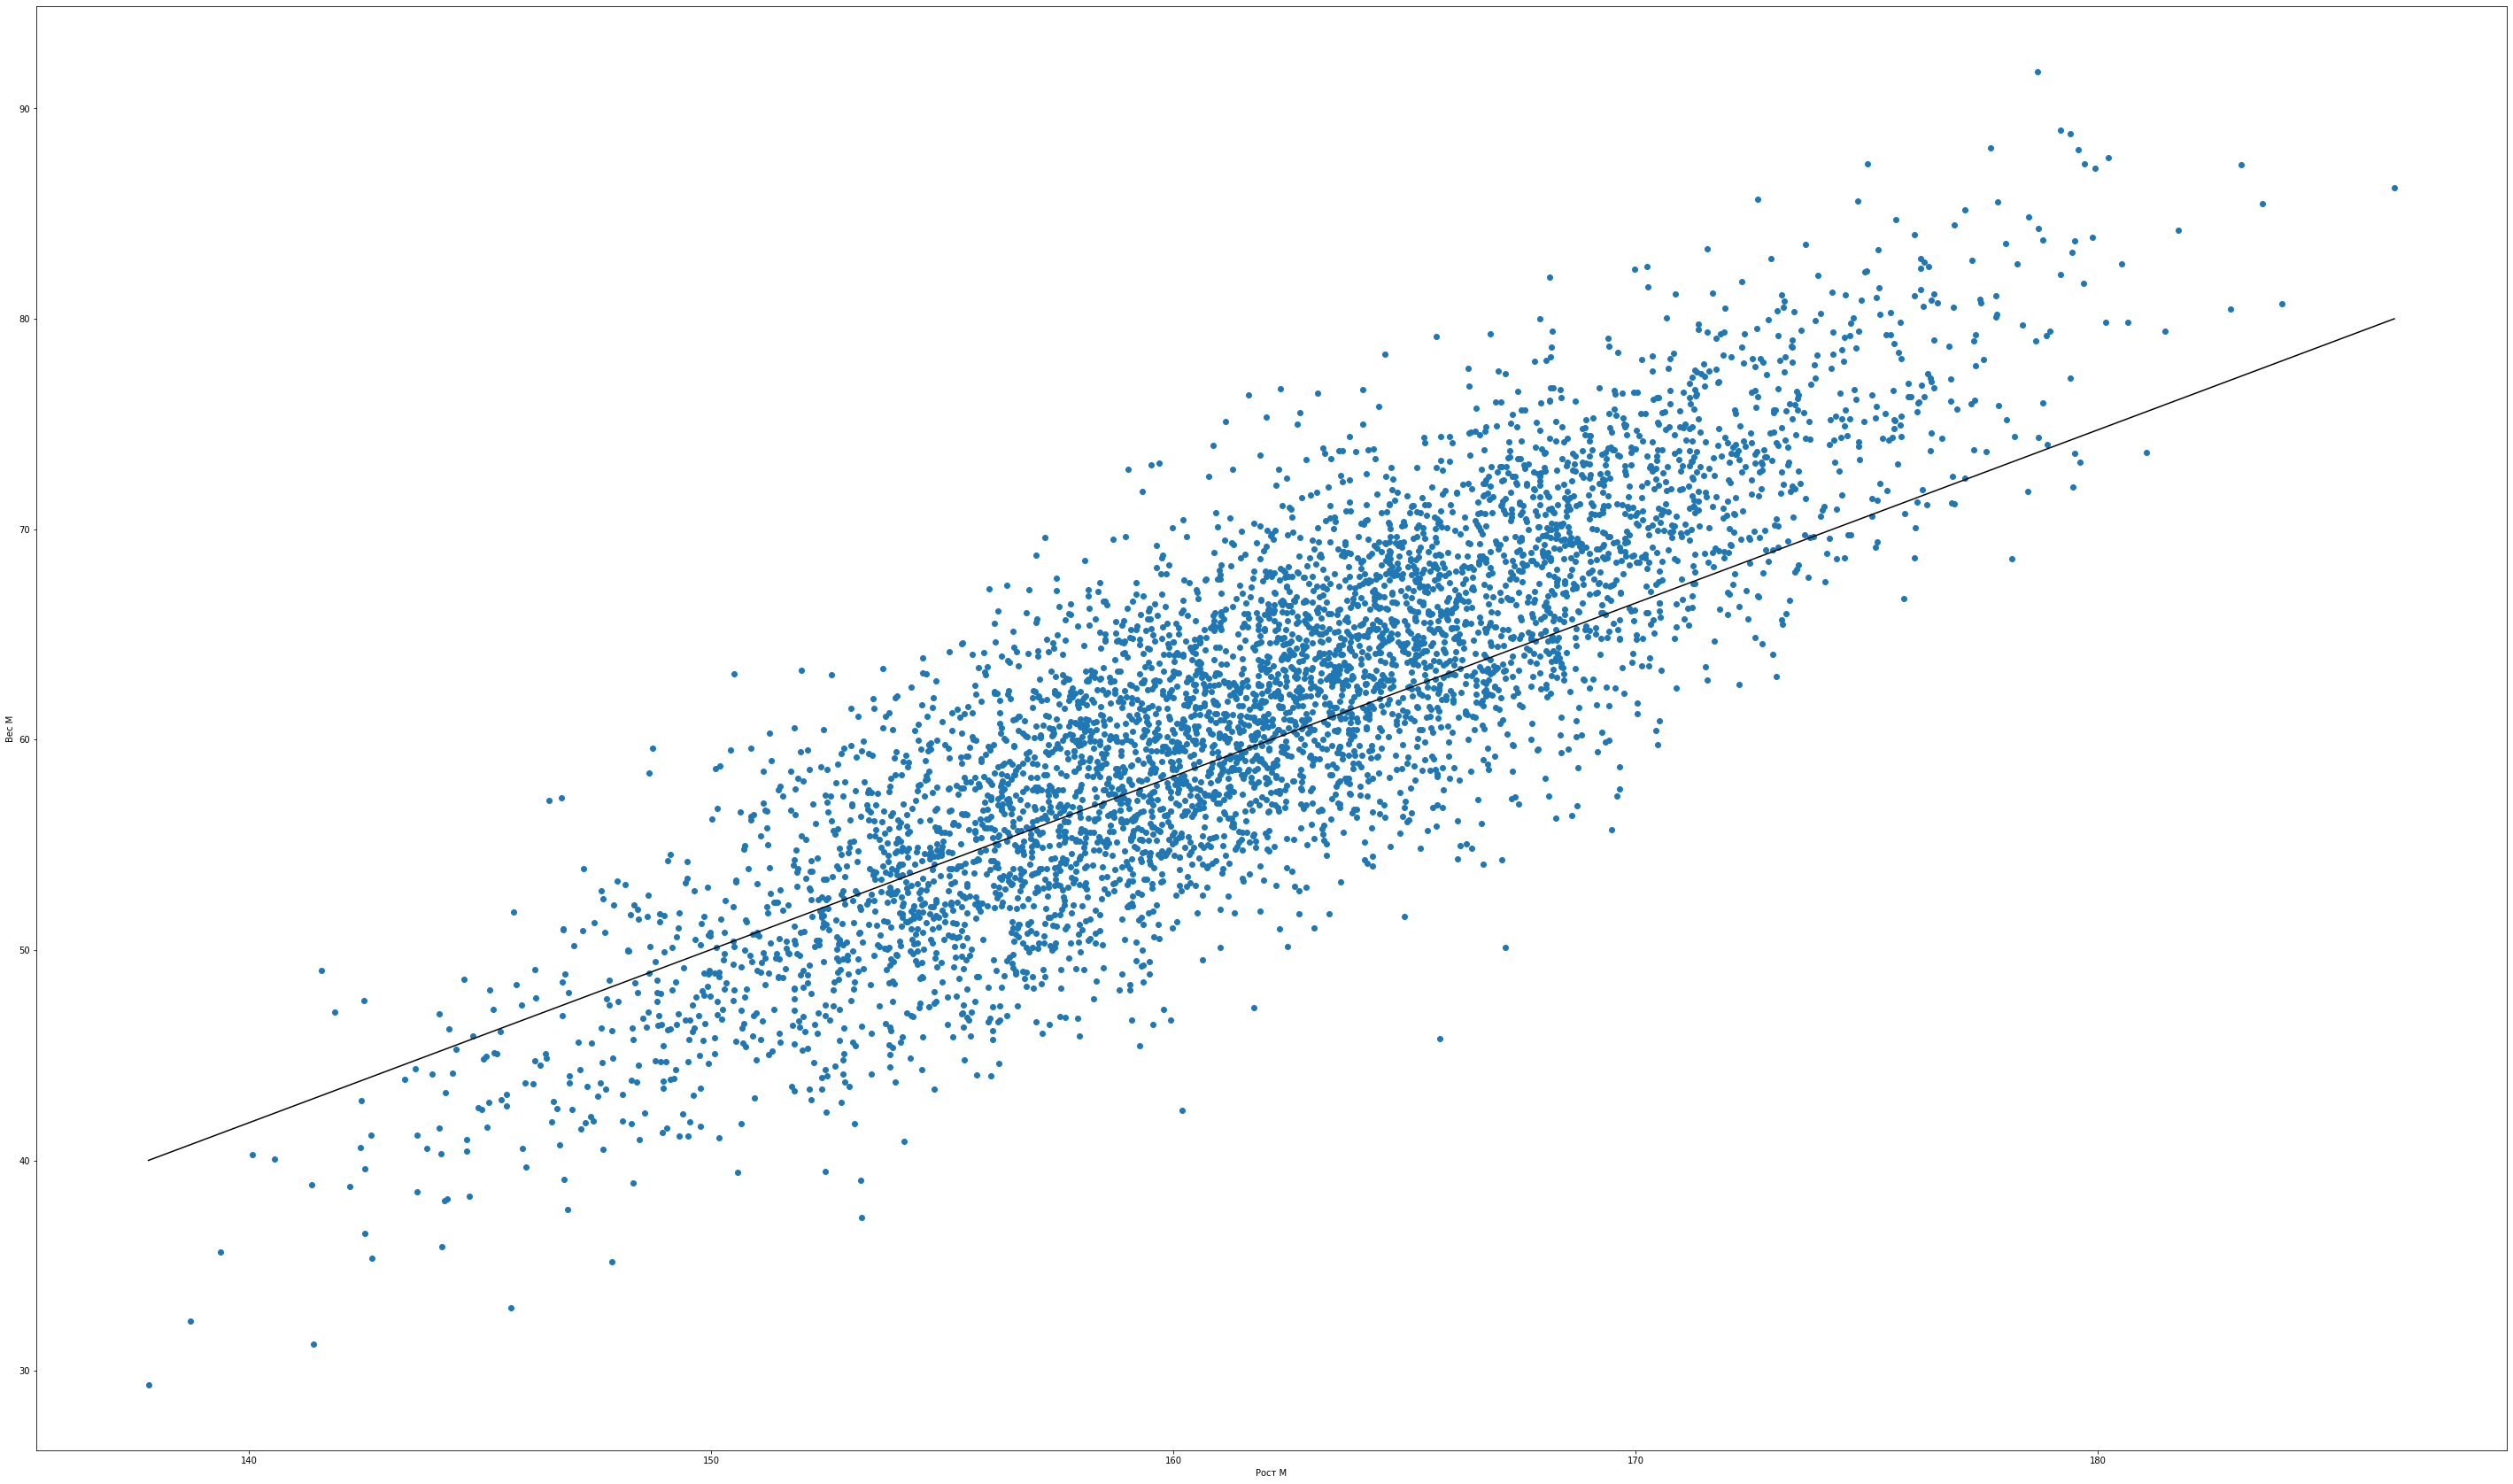

In [149]:
# Женский график регрессии
fig, ax = plt.subplots(figsize=(50, 30))
ax.scatter(x=fem['Height'], y=fem['Weight'])
min_max = [fem['Height'].min(), fem['Height'].max()]
ax.plot(min_max, pipe_fem.predict(np.array(min_max).reshape(-1, 1)), color='k')
plt.xlabel("Рост М")
plt.ylabel("Вес М")

In [164]:
Height = 180 #@param {type:"number", min:0}
Sex = 'Male' #@param ["Male", "Female"]

if Sex == 'Male':
  res = pipe_men.predict(np.array([Height]).reshape(1, -1))
  print("Ваш вес: "+ str(res[0]))
if Sex == 'Female':
  res = pipe_fem.predict(np.array([Height]).reshape(1, -1))
  print("Ваш вес: "+ str(res[0]))

Ваш вес: 89
